In [1]:
# 코드 자동완성 허용
%config Completer.use_jedi = False

# cell 너비 확장
from IPython.display import display, HTML

display(
    HTML(
        data="""
            <style>
                div#notebook-container      { width: 99%}
                div#menubar-container       { width: 99%}
                div#maintoolbar-container   { width: 99%}
            </style>
        """
    )
)

In [2]:
# import library
from IPython.display import display
import pandas as pd
pd.set_option('display.max_columns', None) # Unlimiting Output Length
pd.set_option('display.max_row', None) # Unlimiting Output Length
pd.set_option('display.max_colwidth', None) # Unlimiting Output Column Width Length

import gspread as gs
from gspread_formatting import *

# import math library
from math import *
from decimal import Decimal

import numpy as np

# clustering & visualization
import matplotlib.pyplot as plt
from upsetplot import from_memberships, plot

In [3]:
# read google spread sheet(core features)

gc = gs.service_account(filename='../secure-outpost-380004-8d45b1504f3e.json')

sheet = gc.open('CPU Feature Visualization').worksheet('feature groups(all)')
df = pd.DataFrame(sheet.get_all_records())
featureGroups = df['feature groups'].tolist()

df = df.drop('feature groups', axis=1)
df = df.drop('Flags', axis=1)

values = []
for i in range(len(df)):
    values.append(df.iloc[i].tolist())

print(values)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], [1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], [1, 0, 1, 0, 0, 0, 1, 0, 0, 1,

In [4]:
# 활성화된 flag 개수 추출 및 활성화된 flag의 개수가 같으나 종류가 다른 그룹의 조합을 추출
flagsCount = []

for i in range(len(values)):
    count = values[i].count(1)
    flagsCount.append(count)
    print(f'group{i+2} : {count}')

duplicates = []

for value in set(flagsCount):
    if flagsCount.count(value) > 1:
        duplicates.append(value)

# print(duplicates)

for value in duplicates:
    indexes_of_ones = [index + 2 for index, count in enumerate(flagsCount) if count == value]
    print(indexes_of_ones)

group2 : 3
group3 : 44
group4 : 57
group5 : 43
group6 : 50
group7 : 42
group8 : 53
group9 : 49
group10 : 41
group11 : 59
group12 : 40
group13 : 39
group14 : 36
group15 : 35
group16 : 29
group17 : 38
group18 : 36
group19 : 15
group20 : 20
group21 : 28
group22 : 70
group23 : 41
group24 : 42
group25 : 33
group26 : 27
group27 : 46
group28 : 38
group29 : 49
group30 : 51
group31 : 32
group32 : 49
group33 : 50
group34 : 51
group35 : 68
group36 : 42
group37 : 53
group38 : 36
group39 : 48
group40 : 50
group41 : 65
[14, 18, 38]
[17, 28]
[10, 23]
[7, 24, 36]
[9, 29, 32]
[6, 33, 40]
[30, 34]
[8, 37]


,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
2,True,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,False,True,True,True,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41   
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  True     1
                                                                                                                                                                                                                                                     True   False  False  False  False    1
                                                                                                                                                         

Transferable group2 to 2, 13, 14, 15, 16, 17, 18, 19, 20, 21, 32, 33, 34, 36, 38, 39, 40, 
Transferable group3 to 3, 
Transferable group4 to 4, 
Transferable group5 to 3, 5, 
Transferable group6 to 4, 6, 
Transferable group7 to 3, 4, 5, 6, 7, 
Transferable group8 to 8, 
Transferable group9 to 8, 9, 
Transferable group10 to 3, 4, 5, 6, 7, 8, 9, 10, 
Transferable group11 to 11, 
Transferable group12 to 12, 
Transferable group13 to 13, 
Transferable group14 to 13, 14, 
Transferable group15 to 13, 15, 17, 18, 
Transferable group16 to 13, 14, 15, 16, 17, 18, 
Transferable group17 to 13, 17, 
Transferable group18 to 13, 17, 18, 
Transferable group19 to 13, 14, 15, 16, 17, 18, 19, 20, 21, 
Transferable group20 to 13, 14, 15, 16, 17, 18, 20, 21, 
Transferable group21 to 13, 14, 15, 16, 17, 18, 21, 
Transferable group22 to 22, 
Transferable group23 to 23, 24, 27, 
Transferable group24 to 24, 
Transferable group25 to 23, 24, 25, 27, 28, 36, 
Transferable group26 to 23, 24, 25, 26, 27, 28, 31, 36

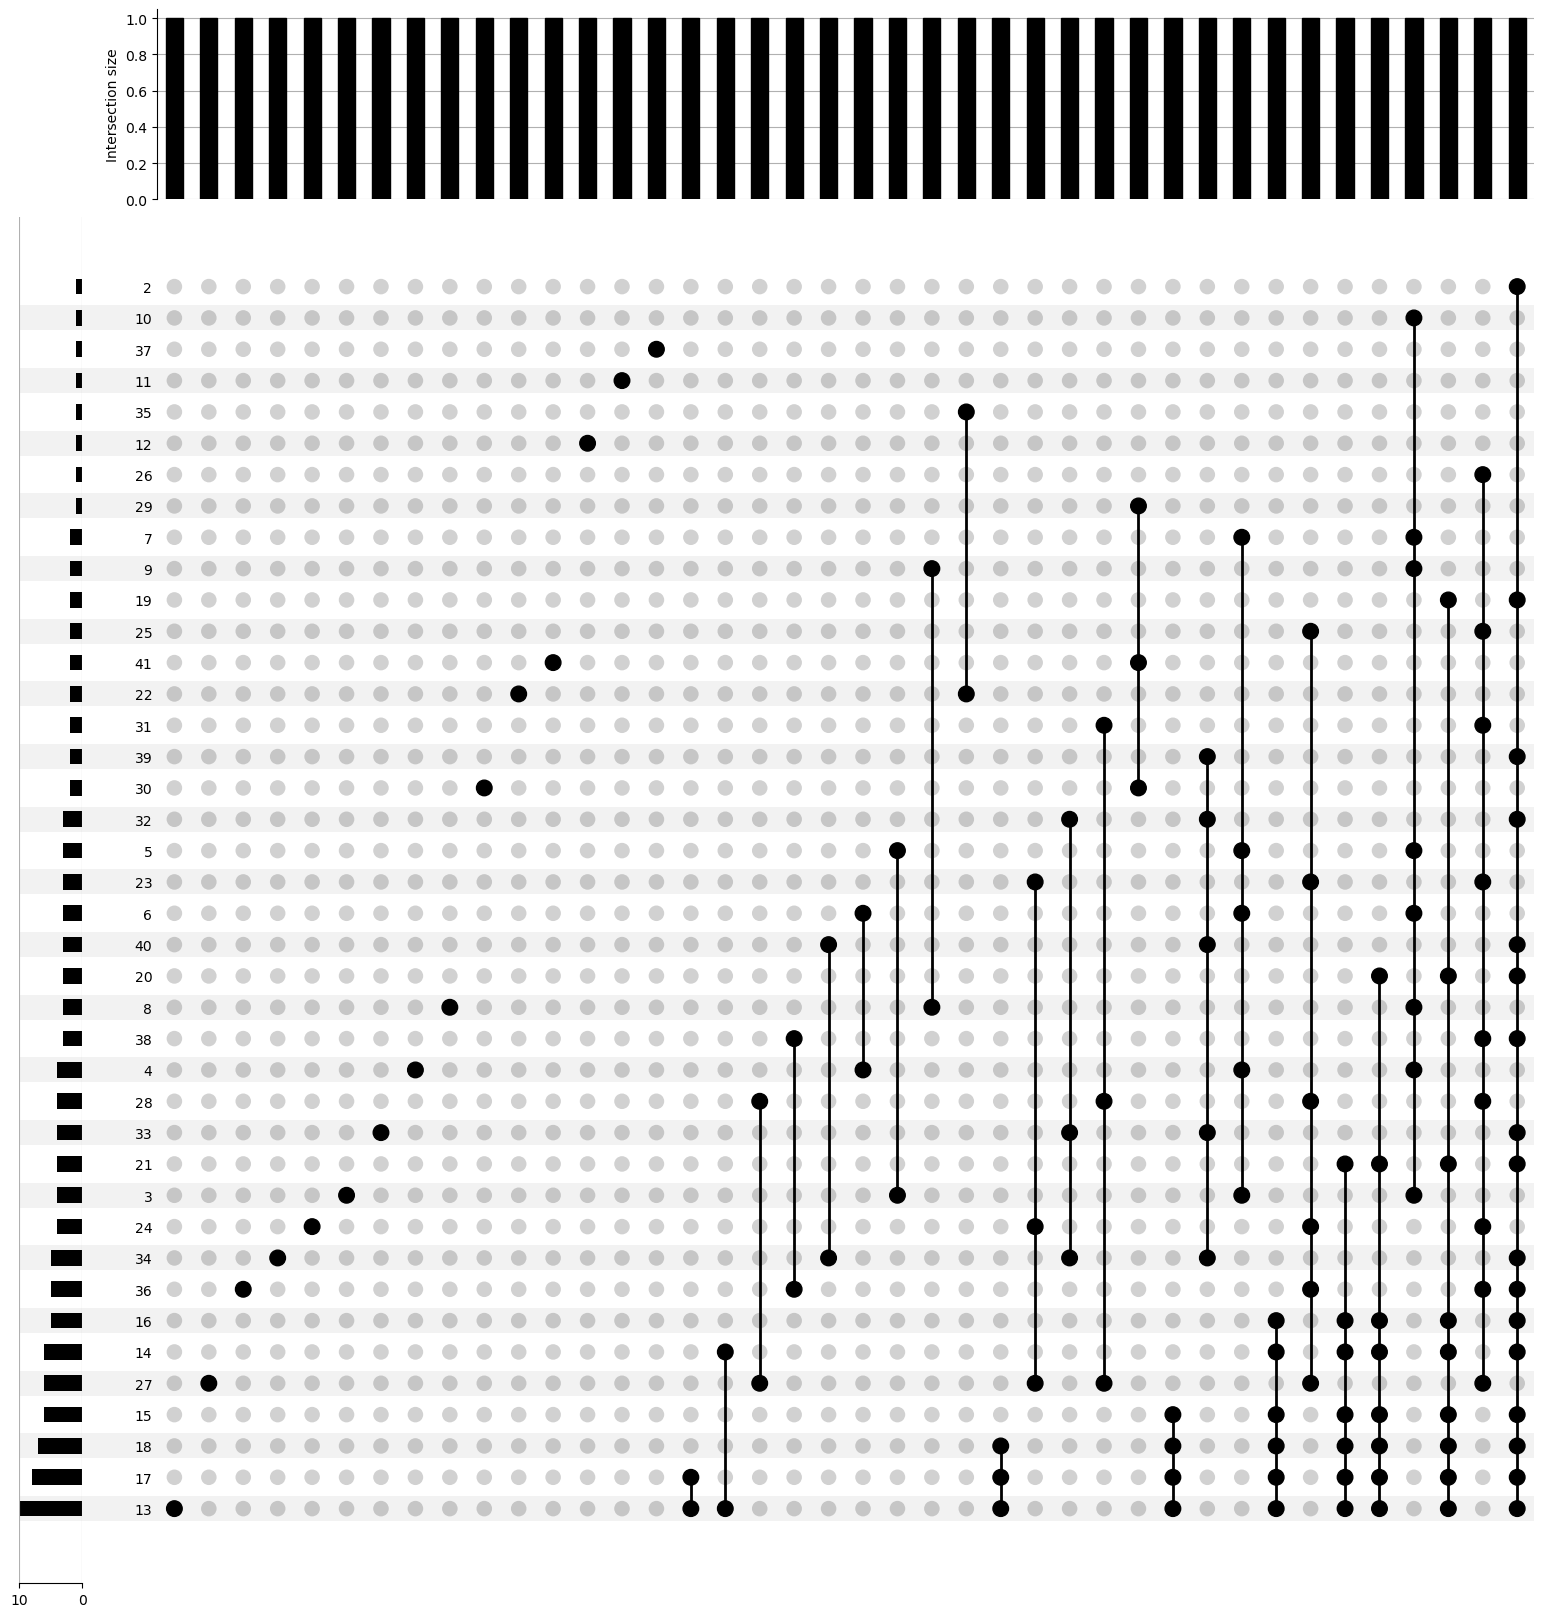

In [5]:
from upsetplot import plot
flagToBinary = []

groupNumber = [str(i) for i in range(2,42)]


for value in values:
    binary_string = ''.join(str(i) for i in value)
    binary_number = int(binary_string, 2)
    flagToBinary.append(binary_number)

matrix = []
for binary in flagToBinary:
    row = []
    for i in range(len(flagToBinary)):
        if(binary & flagToBinary[i] == binary):
            row.append(True)
        else:
            row.append(False)
    matrix.append(row)

transferable = pd.DataFrame(matrix, columns=groupNumber)
transferable.index = range(2, len(transferable)+2)
display(transferable)
transferable = transferable.groupby(groupNumber).size()
display(transferable)

plot(transferable, orientation='horizontal')

for i in range(len(matrix)):
    print(f'Transferable group{i+2} to ',end='')
    for j in range(len(matrix[i])):
        if(matrix[i][j]):
            print(j+2, end=', ')
    print()